In [1]:
import pandas as pd

# Load the provided datasets
train_data_path = 'train.csv'
test_data_path = 'test.csv'

# Read the CSV files
train_df = pd.read_csv(train_data_path)
test_df = pd.read_csv(test_data_path)

# Display the first few rows of the train dataset to understand its structure
train_df.head()


,id;year;hour;season;holiday;workingday;weather;temp;atemp;humidity;windspeed;count
0,3;2012;23;3;0;0;2;23.78;27.275;73;11.0014;133
1,4;2011;8;3;0;0;1;27.88;31.82;57;0;132
2,5;2012;2;1;0;1;1;20.5;24.24;59;0;19
3,7;2011;20;3;0;1;3;25.42;28.79;83;19.9995;58
4,8;2011;17;3;0;1;3;26.24;28.79;89;0;285


In [2]:
# It seems like the delimiter for the file is not properly recognized. Let's try reading the file again with the correct delimiter.

train_df = pd.read_csv(train_data_path, delimiter=';')
train_df.head()


,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,3,2012,23,3,0,0,2,23.78,27.275,73,11.0014,133
1,4,2011,8,3,0,0,1,27.88,31.820,57,0.0000,132
2,5,2012,2,1,0,1,1,20.50,24.240,59,0.0000,19
3,7,2011,20,3,0,1,3,25.42,28.790,83,19.9995,58
4,8,2011,17,3,0,1,3,26.24,28.790,89,0.0000,285


In [3]:
# Load and inspect the test data in the same way to ensure consistency
test_df = pd.read_csv(test_data_path, delimiter=';')
test_df.head()


,Unnamed: 0,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1,2012,21,3,0,0,1,29.52,34.850,79,6.0032
1,2,2012,3,2,0,0,1,23.78,27.275,83,0.0000
2,6,2011,10,1,0,1,3,16.40,20.455,0,11.0014
3,14,2012,19,1,0,1,1,13.94,15.150,46,19.9995
4,17,2011,23,3,0,1,2,26.24,30.305,73,11.0014


In [4]:
# Data cleaning: Handle any missing values and ensure data types are correct

# Check for missing values
missing_values_train = train_df.isnull().sum()
missing_values_test = test_df.isnull().sum()

# Check the data types and basic stats for anomalies
train_info = train_df.info()
test_info = test_df.info()

# Display results
missing_values_train, missing_values_test, train_info, test_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7689 non-null   int64  
 1   year        7689 non-null   int64  
 2   hour        7689 non-null   int64  
 3   season      7689 non-null   int64  
 4   holiday     7689 non-null   int64  
 5   workingday  7689 non-null   int64  
 6   weather     7689 non-null   int64  
 7   temp        7689 non-null   float64
 8   atemp       7689 non-null   float64
 9   humidity    7689 non-null   int64  
 10  windspeed   7689 non-null   float64
 11  count       7689 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 721.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3196 non-null   int64  
 1   year        3196 non-null   int6

(id            0
 year          0
 hour          0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 count         0
 dtype: int64,
 Unnamed: 0    0
 year          0
 hour          0
 season        0
 holiday       0
 workingday    0
 weather       0
 temp          0
 atemp         0
 humidity      0
 windspeed     0
 dtype: int64,
 None,
 None)

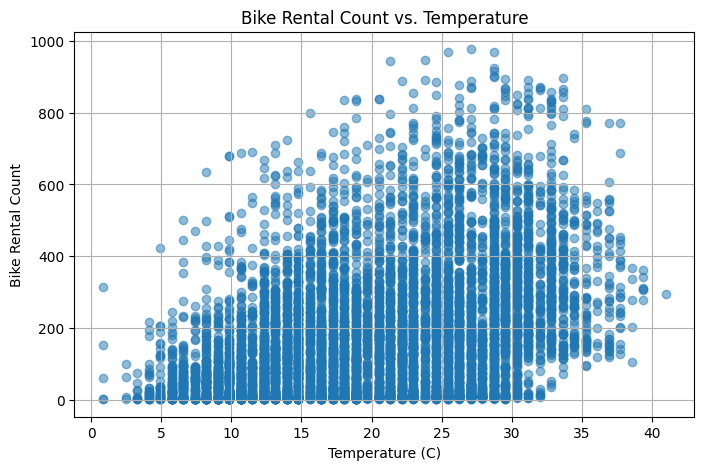

In [5]:
# Since there are no missing values and the data types are correct, let's move on to the exploratory data analysis (EDA)

# We'll generate 2-3 visualizations to understand the data better

import matplotlib.pyplot as plt

# 1. Plot the relationship between temperature and bike rental count
plt.figure(figsize=(8, 5))
plt.scatter(train_df['temp'], train_df['count'], alpha=0.5)
plt.title('Bike Rental Count vs. Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Bike Rental Count')
plt.grid(True)
plt.show()

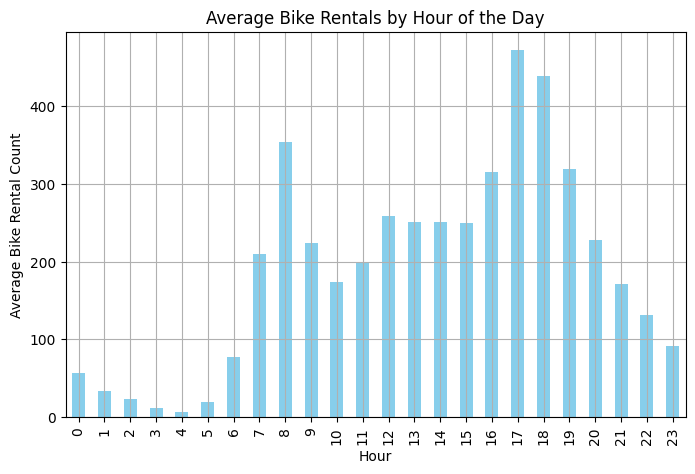

In [6]:

# 2. Plot the hourly bike rentals to see the pattern across the day
plt.figure(figsize=(8, 5))
train_df.groupby('hour')['count'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Average Bike Rental Count')
plt.grid(True)
plt.show()

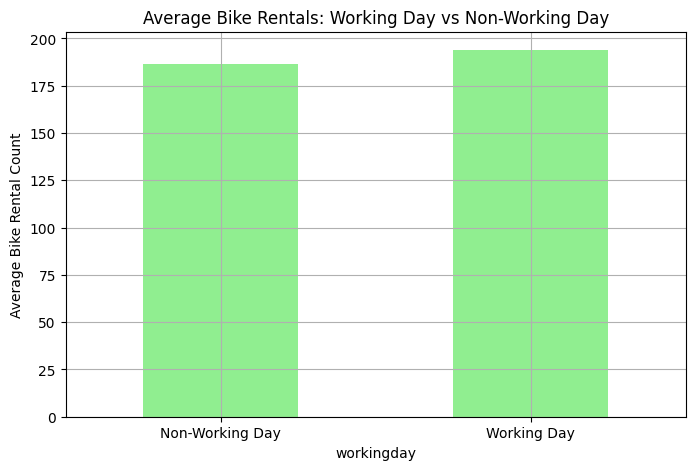

In [7]:

# 3. Plot the impact of working day on bike rentals
plt.figure(figsize=(8, 5))
train_df.groupby('workingday')['count'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Bike Rentals: Working Day vs Non-Working Day')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'], rotation=0)
plt.ylabel('Average Bike Rental Count')
plt.grid(True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = train_df.drop(columns=['count'])  # Drop the target variable 'count'
y = train_df['count']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6151, 11), (1538, 11), (6151,), (1538,))

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model on the training data
linear_reg.fit(X_train, y_train)

# Predict the rental count on the test data
y_pred_linear = linear_reg.predict(X_test)

# Evaluate the model
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Display the evaluation metrics for Linear Regression
rmse_linear, mae_linear, r2_linear


(143.31920000758348, 107.80490677469689, 0.38371650159614124)

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Predict the rental count on the test data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Display the evaluation metrics for Random Forest Regression
rmse_rf, mae_rf, r2_rf


(47.13061275967809, 29.86648244473342, 0.933353405777328)

In [11]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict the rental count on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Display the evaluation metrics for XGBoost
rmse_xgb, mae_xgb, r2_xgb


(47.5778516684418, 30.671921484743976, 0.9320825338363647)

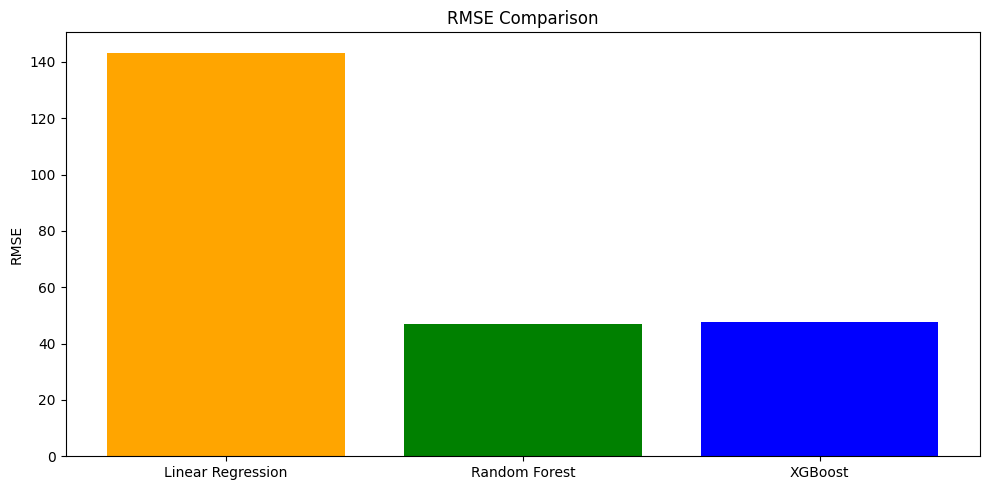

In [19]:
import matplotlib.pyplot as plt

# Model names and their respective evaluation metrics
models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmse_values = [143.32, 47.13, 47.58]
mae_values = [107.80, 29.87, 30.67]
r2_values = [0.38, 0.93, 0.93]

# Plot RMSE comparison
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values, color=['orange', 'green', 'blue'])
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

# Adjust layout
plt.tight_layout()
plt.show()


Text(0, 0.5, 'MAE')

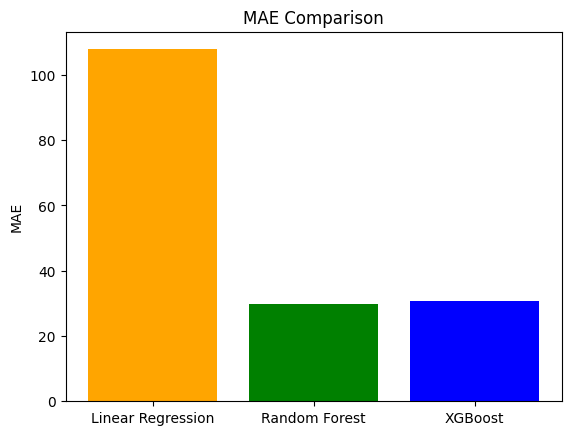

In [17]:
# Plot MAE comparison
plt.bar(models, mae_values, color=['orange', 'green', 'blue'])
plt.title('MAE Comparison')
plt.ylabel('MAE')

Text(0, 0.5, 'R²')

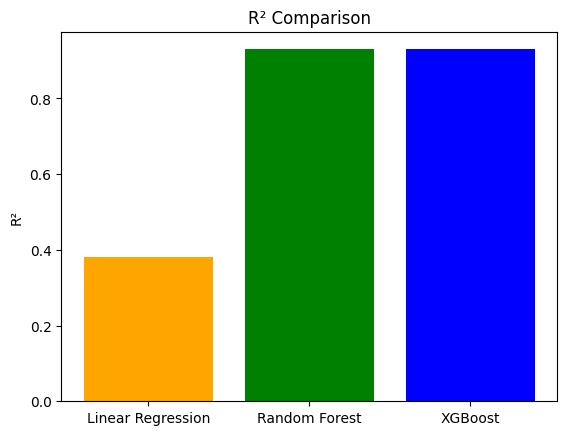

In [18]:

# Plot R² comparison

plt.bar(models, r2_values, color=['orange', 'green', 'blue'])
plt.title('R² Comparison')
plt.ylabel('R²')